# Team ID - PNT2022TMID18129 

# Importing The Required Libraries

In [73]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten


In [74]:
from tensorflow.keras.layers import Conv2D

In [75]:
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt

In [76]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam 

# Loading The Data

In [9]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


# Analyzing The Data

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

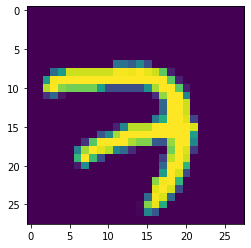

In [12]:
plt.imshow(x_train[5000]) 

In [13]:
np.argmax(y_train[6000])

0

# Reshaping The Data

In [14]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [15]:
number_of_classes = 10 

# Applying One Hot Encoding

In [16]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [17]:
model=Sequential ()

In [18]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling The Model

In [21]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [22]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


# Train The Model

In [23]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.1991 - accuracy: 0.9534 - val_loss: 0.0935 - val_accuracy: 0.9735
Epoch 2/5
1875/1875 [==============================] - 213s 114ms/step - loss: 0.0621 - accuracy: 0.9815 - val_loss: 0.0646 - val_accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 213s 114ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0835 - val_accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.1000 - val_accuracy: 0.9782


# Observing The Metrics

In [24]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10000166296958923, 0.9782000184059143]


# Test The Model

In [25]:
prediction=model.predict(x_test[3000:3001])
print(prediction)

[[1.5913842e-21 8.1132930e-19 9.5551459e-23 3.5133104e-20 9.2702416e-17
  7.5713137e-11 1.0000000e+00 6.1297493e-27 7.5029948e-12 3.6705726e-20]]


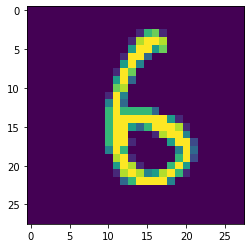

In [26]:
plt.imshow(x_test[3000])

In [27]:
print(np.argmax(prediction, axis=1))

[6]


In [28]:
np.argmax(y_test[3000:3001])

6

# Save The Model

In [29]:
model.save('models/mnistCNN.h5')

In [30]:
cd models

/home/wsuser/work/models


In [31]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [32]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.1 MB/s eta 0:00:01


# Cloud Deploy

In [40]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"HxPnLgwqJDWDks63QY3Bty0VZBNSz8x8Mso_UR0_Ihoj"
}
client = APIClient(credentials)

In [54]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [55]:
space_uid = guid_from_space_name(client,'Digitrecognition')
print("Space UID = " + space_uid)

Space UID = a4d498c2-23dc-49fc-8be0-577f3d082c92


In [56]:
client.set.default_space(space_uid)

'SUCCESS'

In [57]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [58]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [59]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [60]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-11T17:56:44.002Z',
  'id': '6073effb-74d9-4ace-856d-0411cfbe6c09',
  'modified_at': '2022-11-11T17:56:47.212Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-667000EZDS',
  'resource_key': '4c5b58fc-33f2-424f-9cef-b44e7534e82d',
  'space_id': 'a4d498c2-23dc-49fc-8be0-577f3d082c92'},
 'system': {'warnings': []}}

In [61]:
model_id = client.repository.get_model_id(model_details)
model_id

'6073effb-74d9-4ace-856d-0411cfbe6c09'

In [63]:
client.repository.download(model_id,'digitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'digitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/digitRecog_IBM_model.tar.gz'

# Test the Model

In [80]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [81]:
model = load_model("mnistCNN.h5")

In [82]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gO9Lz_-weMOUF8VpKZRd9t3iicWNzSKcF59JKwxkx4Eg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-bnrlkchvymusdw'
object_key = 'mnist-dataset-3.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [83]:
img = Image.open(streaming_body_1).convert("L")
img = img.resize( (28,28) )

In [84]:
img

In [85]:
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 28, 28, 1)

In [86]:
pred = model.predict(im2arr)
print(pred)

[[9.2903363e-08 3.4811689e-14 2.6743678e-11 9.9999976e-01 1.8006752e-14
  1.2555390e-07 1.1633670e-13 5.5902119e-12 2.7492250e-13 4.9024586e-11]]


In [87]:
print(np.argmax(pred, axis=1))

[3]
